# Homework 2 (HW2)

---
By the end of this homework we expect you to be able to:
1. Preprocess data and make it amenable to statistical analysis and machine learning models;
2. Train and test out-of-the-box machine learning models in Python;
3. Carry out statistical hypothesis testing;
4. Carry out simple multivariate regression analyses;
5. Use techniques to control for covariates;

---

## Important Dates

- Homework release: Fri 12 Nov 2021
- **Homework due**: Fri 26 Nov 2021, 23:59
- Grade release: Fri 03 Dec 2021

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be **strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

Congratulations! You have just been hired as a data scientist at *Piccardi Music,* a promising new music label created by a mysterious Italian disc jockey "*Signor Piccardi*". The company hired you to carry out a variety of data-related tasks, which will be explained in further detail below.

---

## The data

For this homework you will use a dataset of 18,403 music reviews scraped from Pitchfork¹, including relevant metadata such as review author, review date, record release year, review score, and genre, along with the respective album's audio features pulled from Spotify's API. The data consists of the following columns:

| Column   | Description  |
|----------|:-------------|
| `artist`           | The name of the artist who created the album being reviewed. |
| `album`            | The name of the album being reviewed. |
| `recordlabel`      | The name of the record label(s) who published the album. |
| `releaseyear`      | The year that the album was released. |
| `score`            | The score given to the album by the reviewer on a scale of 0.0 to 10.0. |
| `reviewauthor`     | The name of the author who reviewed the album. |
| `genre`            | The genre assigned to the album by Pitchfork. |
| `reviewdate`       | The date that the review was published.  |
| `key` | The estimated overall musical key of the track. Integers map to pitches using standard Pitch Class notation (e.g., 0 = C, 2 = D, and so on) |
| `acousticness` | A confidence measure from 0.0 to 1.0 of whether an album is acoustic. 1.0 represents high confidencethat the album is acoustic. |
| `danceability` | How suitable an album is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 1.0 is most danceable.
| `energy` | A perceptual measure of intensity and activity, from 0.0 to 1.0, where 1.0 represents high energy. Metal is often high energy. |
| `instrumentalness` | Predicts whether an album contains no vocals, from 0.0 to 1.0. The closer to 1.0, the more likely the album contains no vocals. |
| `liveness` | Detects the presence of an audience, from 0.0 to 1.0. Scores greater than 0.8 indicate a strong likelihood the album is live. |
| `loudness` | The overall loudness of the album in decibels (dB). |
| `speechiness` | Measures the presence of spoken words in an album on a scale from 0.0 to 1.0. Scores higher than 0.66 indicate an album made entirely of spoken words, while scores below 0.33 indicate music and other non-speech-like elements. |
| `valence` | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by an album, where values closer to 1.0 indicate more positive sounds. |
| `tempo` | The overall estimated tempo of an album in beats per minute (BPM). |

¹Pinter, Anthony T., et al. "P4KxSpotify: A Dataset of Pitchfork Music Reviews and Spotify Musical Features." Proceedings of the International AAAI Conference on Web and Social Media. Vol. 14. 2020.

In [347]:
# CHANGE THIS IF YOU NEED/WANT TOO

# pandas / numpy
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# datetime operations
from datetime import datetime

# ttest and euclidean distance
from scipy.stats import ttest_ind
from scipy.spatial.distance import seuclidean

# linear fit using statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# good ole sklearn
from sklearn.metrics import euclidean_distances, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# displaying markdown strings
from IPython.display import display, Markdown, Latex

## Part 1: Will this album be a hit?

The first project you embark on in your new job is to build a regressor to predict whether an album will be well received or not. According to *Signor Piccardi* (your boss), this algorithm may eventually be helpful in forecasting the success of albums produced by *Piccardi Music*.

**Task 1 (Initial analyses — 10 pts)**

As a good data scientist, the first thing you do is to have a good look at the data that was handed to you.

1. Load the data using `pandas`. Identify and remove duplicate reviews, i.e., two reviews with albums by the same band with the same name (keep the first occurrence). Print the number of rows in your dataframe.

2. Plot the distribution of album release years and the average score of albums per year.

3. For numerical columns, calculate the mean, median, minimum value and maximum value. Additionally, plot the distribution for all the numerical columns in a single image (possibly with multiple subplots). Your image should be at most 14 inches wide by 14 inches long.

3. For categorical columns, list how many different values there are in each column. If there are less than 10 distinct values for a category, print them all. For the `genre` column, assign the value `'Other'` for albums where the value is either `'none'` or `NaN`.

5. **Discuss:** This dataset was built with *found data*—i.e., the Pitchfork reviews were not made with the goal of training a machine learning model. Grounded on the previous analyses and in Pitchfork's [Wikipedia page](https://en.wikipedia.org/wiki/Pitchfork_(website)), point **three** (exactly!) ways in which this data may not be representative of music albums in general due to the way the data was collected. 

---

In [10]:
#Fisrt we load the data.
DATA_PATH = './data/pitchfork.csv.gz'
data = pd.read_csv(DATA_PATH)

In [11]:
data[data.duplicated(subset=['artist','album'],keep=False)].head(5)

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
10,American Football,American Football,Ian Cohen,8.6,1999.0,May 21 2014,Polyvinyl,Rock,0.482778,0.681889,5.222222,-9.121778,0.031889,0.272561,0.361657,0.141989,0.282889,123.864000
11,American Football,American Football,Ian Cohen,7.7,2016.0,October 26 2016,Polyvinyl,Rock,0.482778,0.681889,5.222222,-9.121778,0.031889,0.272561,0.361657,0.141989,0.282889,123.864000
91,Crystal Castles,Crystal Castles,Ian Cohen,7.8,2008.0,March 17 2008,Last Gang,Electronic,0.630529,0.730353,4.294118,-7.089176,0.052694,0.116483,0.258783,0.200553,0.569471,123.956529
92,Crystal Castles,Crystal Castles,Ian Cohen,8.5,2010.0,April 29 2010,Fiction,Electronic,0.630529,0.730353,4.294118,-7.089176,0.052694,0.116483,0.258783,0.200553,0.569471,123.956529
293,Ty Segall,Ty Segall,Stuart Berman,8.0,2017.0,January 25 2017,Drag City,Rock,0.300100,0.560550,4.300000,-10.878100,0.044340,0.142807,0.051030,0.136800,0.423400,120.459300


In [12]:
data = data.drop_duplicates(subset=['artist','album'],keep='first',inplace=False)
num_duplicate = data.duplicated(subset=['artist','album']).sum()
print(f'There are {num_duplicate} duplicates in the dataframe.')
print(f'There are {len(data)} rows in the dataframe.')

There are 0 duplicates in the dataframe.
There are 16738 rows in the dataframe.


In [13]:
data = data[~(data.select_dtypes(include=[np.number]).drop(columns='loudness')<0).sum(axis = 1).astype('bool')].reset_index(drop=True)

In [14]:
#After filtering the negative numerical values
print(f'There are {len(data)} rows in the dataframe.')

There are 16730 rows in the dataframe.


#### **Task 2 (Pre-processing and pipeline code — 12 pts)**

Next, you decide to prepare the code that will help you in training your machine learning models. Also, you implement a simple baseline. For this task, **unless otherwise stated** you must implement functions yourself, instead of relying on `scikit-learn` (you can use `numpy` or `pandas`, though!).

1. For each possible value in the `genre` column, create a new column called `{genre}_onehot` (e.g., for `genre=jazz`, create `jazz_onehot`). Collectively, these new columns should "one hot-encode" the genre column—for instance, if for a given album the `genre` is filled with the value `jazz`, the `jazz_onehot` column should equal 1 and all other `{genre}_onehot` columns should equal 0. 

2. Create a function `numpy_helper(df, cols)` to obtain a `numpy.array` out of your `dataframe`. The function should receive a dataframe `df` with N rows and a list of M columns `cols`, and should return a `np.array` of dimension (NxM).

3. For each album, build an array of features `X` containing all genre-related one-hot features, and an array of outcomes `y` containing scores. Using the function [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with `random_state=123`, split the data into a train set containing 70% of all data, and a test set containing the remaining 30%.

4. Create your own baseline regressor. Using the training data (in the training stage), your regressor should estimate the average score for all albums. Then, for the test data (in the prediction stage), your classifier should always output the average score (computed on the training data).

5. Calculate the [coefficient of determination ($R^2$)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) of your baseline on the test data. **You are allowed to use the `sklearn` implementation here.**

6. **Discuss:** Your train-test split randomly selected 70% of all data for the training set. Why is this a problem for the broader task of predicting whether a future album will be successful or not?

---

**Task 3 (Regression — 14 pts)**

Finally, you get down to business and train your regression models.

1. Build a Linear Regression model (use `sklearn`) that predicts the outcome `score` using the features "releaseyear",  "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo" and the one-hot encoded genre-related columns.  Using a 70/30 train-test split similar to what you did in task two (hereinafter referred to as "the random split", use the same random seed, `random_state=123`), report the $R^2$ for the testing set.

2. Create an alternate train-test split (hereinafter referred to as "the longitudinal split") where you train with data from albums released before 2000 and test with data from 2003 and after. Report the $R^2$ for the testing set using the same model you developed for the previous question. **Discuss:** give the correct interpretation of $R^2$ value for the longitudinal split.

3. For a given entry $X$ your model outputs a predicted score $Y'$. The difference between the real score $Y$ and the predicted score $Y'$ is called the "residual". Considering the model trained in 3.2, plot the distribution of your residuals for the test set. Additionally, estimate what is the probability that your score prediction (from 3.2) is off by more than 2-points? Provide bootstrapped confidence intervals for your answer.

4. Experiment with training a different regressor, a Gradient Boosting Regressor. This regressor is related to the Boosted decision trees that you have seen in class. This model performs extremely well for a variety of tasks and is often used in machine learning competitions for tabular data (e.g., on Kaggle). Train the regressor using the longitudinal split and the same features as in 3.2, use the default hyperparameters. Report the $R^2$ for the testing set. 

5. **Discuss:** Hypothesize a reason for the difference in performance between the Linear regression and the Gradient Boosting Regressor.

---

**Task 4 (Are we solving the correct problem? — 16 pts)**

All your efforts so far have assumed that decisions are taken at the "album" level, which is often not the case for bands with multiple albums. In those cases, it could be interesting to predict what is the success of a given band album given the features of the album **and of previous albums**.

1. Create a new dataframe that contains one row per band with more than 1 album. This dataframe should have the same columns as the data provided to you, considering the latest album of the respective band (note that this is determined by the release year of the album, not the date when it was reviewed). Additionally, for each feature considered in Task 3.1 (including the one-hot encoded features), create an additional column post-fixed with `_previous` (e.g., `danceability_previous`). These columns should contain the average values for all of the band's previous albums. Also, create a column `score_previous` with the average score of previous albums. Print the number of rows in the dataframe as well as the name of the columns.

2. Train a Gradient Boosting Regressor considering all features created in Task 4.1 (note that `score` is the outcome and everything else is a feature, including `score_previous`). Use the 70/30 random train-test split, the default hyperparameters, and report the $R^2$ for the testing set. 

3. Can hyperparameter tuning improve your model? Write modular code (i.e., a function) to divide your training data into $N$ folds and perform cross-validation. Experiment tuning two hyperparameters of the Gradient Boosting Regressor: `n_estimators` and `learning_rate`. For each possible combination of the two hyperparameters (see below for the range of values that you should try for each hyperparameter), train your model in a cross-validation setup with $N=20$ folds. Report the mean  $R^2$ along with the 90% CI for each scenario. 
    - n_estimators $ \in  \{ 100, 200, 300, 400\}$
    - learning_rate $ \in  \{ 0.1, 0.05, 0.01\}$.
 
 With the best hyperparameters obtained, train your model with the entire training set and report the $R^2$ on the testing set.
 
4. **Discuss:** How do these results compare with the previous setup (the scenario considered in **Task 3.4**)? Point out two reasons why it is hard to compare the results obtained in 4.3 and 3.4 at face value? How would you fairly compare the two different setups?

---

## Part 2: Second Album Syndrome

Your second project at *Piccardi Music* is to shed light on one of the business's oldest enigmas: the "second album syndrome." In a nutshell, the "second album syndrome" is a theory that states that the second album of a band always sucks. ([Related read](https://tvtropes.org/pmwiki/pmwiki.php/Main/SophomoreSlump))

Assume—for the purpose of this task—that the Pitchfork data contains all albums for all artists it covers (even though this might not be true in reality).

**Task 5 (Preliminary analyses — 8 pts)**

You begin by carrying out some preliminary data processing and analyses.

1. Create a new dataframe (from the original data with duplicates dropped, the same as you obtained after finishing Task 1.1) containing only albums from artists with two or more albums and where the release year is not empty.
2. Create a new column `album_number` which indicates how many albums the artist has produced before this one (before the second album, the artist has already produced one album).
3. Calculate the mean and the standard error fo the mean of the scores of the first and second albums in the dataset. Additionally, plot the two distributions. 
4. Use an appropriate method to determine if the difference in means of 1st and 2nd albums is statistically significant?
5. **Discuss:** Do these analyses suggest that the "second album syndrome" exists?

---

## Task 5.1

Create a new dataframe (from the original data with duplicates dropped, the same as you obtained after finishing Task 1.1) containing only albums from artists with two or more albums and where the release year is not empty.

In [407]:
#first we check if there is some data where the release year is empty
no_releaseyear=data[data['releaseyear'].isna()]
print(f'There is {len(no_releaseyear)} reviews with no release year')

There is 0 reviews with no release year


We see there is always a release year from the data of Task 1.1), no row need to be dropped yet.

In [408]:
#We obtain the artist with multiple albums
group=data.groupby(['artist'])
more1=group['album'].count()>1
multiple=more1[more1]
multiple_albums= data[data['artist'].isin(multiple.index)]
multiple_albums.head(5)

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308
5,French Kicks,Swimming,Roque Strew,7.6,2008.0,August 27 2008,Vagrant,Electronic,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308
6,Jessica Lea Mayfield,With Blasphemy So Heartfelt,Stephen M. Deusner,8.2,2008.0,November 11 2008,Polymer,Rock,0.447583,0.399083,6.500000,-8.402000,0.032267,0.694750,0.004033,0.123142,0.237933,111.549917


In [409]:
print(f'There is {len(multiple)} artists with more than one album and {len(group)-len(multiple)} with only one')
print(f'{len(multiple_albums)} reviews are from artist with multiple albums')

There is 3561 artists with more than one album and 4329 with only one
12401 reviews are from artist with multiple albums


## Task 5.2

Create a new column `album_number` which indicates how many albums the artist has produced before this one (before the second album, the artist has already produced one album).

In [410]:
#creation of a new column and addition of previous albums
multiple_albums['album_number']= NaN
for artist in multiple.index:
    #sorting from the first released, if it is at the same year we assume it was the first review
    index=multiple_albums[multiple_albums['artist']==artist].sort_values(ascending=True,by=['releaseyear','reviewdate']).index
    n=len(index)
    for i,ind in enumerate(index):
        multiple_albums.loc[ind,'album_number']=i

/var/folders/r7/jht38nh56px_s6jkntzx89n00000gn/T/ipykernel_89716/412502090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_albums['album_number']= NaN
/Users/JeanPierreMero/opt/anaconda3/envs/ada/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [411]:
example=multiple_albums[multiple_albums['artist']=='!!!']
example

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,album_number
468,!!!,Shake the Shudder,Stuart Berman,7.3,2017.0,May 24 2017,Warp,Rock,0.712667,0.773917,4.750000,-7.880500,0.096825,0.106212,0.207607,0.254258,0.693833,122.010583,6.0
2387,!!!,Thr!!!er,Brian Howe,6.0,2013.0,April 30 2013,Warp,Rock,0.778222,0.798444,5.666667,-6.810778,0.060756,0.032423,0.076008,0.161244,0.808111,117.911111,4.0
6859,!!!,Louden Up Now,Nick Sylvester,7.0,2004.0,June 7 2004,Touch and Go,Rock,0.808273,0.751636,6.818182,-7.082636,0.080591,0.116632,0.400204,0.159191,0.692364,119.974091,1.0
7378,!!!,Split EP,Dominique Leone,6.0,1999.0,February 12 2004,GSL,Rock,0.470000,0.909500,6.000000,-4.112000,0.095600,0.000449,0.000000,0.177500,0.596500,97.046500,0.0
10013,!!!,"Strange Weather, Isn't It?",Larry Fitzmaurice,6.9,2010.0,August 20 2010,Warp,Rock,0.711889,0.881778,4.555556,-6.234556,0.047756,0.050500,0.236144,0.241333,0.763889,117.525000,3.0
10477,!!!,Myth Takes,Brian Howe,8.0,2007.0,March 2 2007,Warp,Rock,0.646500,0.831800,5.400000,-6.939000,0.069290,0.091973,0.254866,0.233740,0.561200,116.136200,2.0
14600,!!!,As If,Cameron Cook,6.9,2015.0,October 21 2015,Warp,Rock,0.789818,0.772818,5.727273,-6.133909,0.081027,0.090824,0.111889,0.119209,0.660273,122.090000,5.0
16431,!!!,Wallop,Jesse Dorris,7.2,2019.0,September 7 2019,none,Rock,0.745643,0.737857,5.357143,-8.632500,0.127257,0.098557,0.176297,0.183271,0.529571,120.037500,7.0


In [414]:
#check if all values added:
no_albm_number=multiple_albums[multiple_albums['album_number'].isna()]
print(f'There is {len(no_albm_number)} reviews with album_number=NaN')

There is 0 reviews with album_number=NaN


## Task 5.3

3. Calculate the mean and the standard error fo the mean of the scores of the first and second albums in the dataset. Additionally, plot the two distributions. 

In [415]:
first=multiple_albums[multiple_albums['album_number']==0]
first.head(5)

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,album_number
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500,0.0
6,Jessica Lea Mayfield,With Blasphemy So Heartfelt,Stephen M. Deusner,8.2,2008.0,November 11 2008,Polymer,Rock,0.447583,0.399083,6.500000,-8.402000,0.032267,0.694750,0.004033,0.123142,0.237933,111.549917,0.0
7,The Essex Green,Essex Green EP,Matt LeMay,8.1,2000.0,May 31 2000,Parasol,Rock,0.729000,0.932000,5.000000,-3.038000,0.062300,0.002270,0.197000,0.139000,0.283000,127.988000,0.0
10,American Football,American Football,Ian Cohen,8.6,1999.0,May 21 2014,Polyvinyl,Rock,0.482778,0.681889,5.222222,-9.121778,0.031889,0.272561,0.361657,0.141989,0.282889,123.864000,0.0
11,FIDLAR,FIDLAR,Brandon Stosuy,7.0,2013.0,January 25 2013,Mom & Pop,Rock,0.361714,0.874429,6.928571,-3.941500,0.058093,0.003129,0.266359,0.254007,0.382171,136.582571,0.0


In [416]:
print(f'For the first albums we obtain a mean: {first.score.mean()} and std: {first.score.std()}')

For the first albums we obtain a mean: 7.302808199943832 and std: 1.2387983392308313


In [417]:
second=multiple_albums[multiple_albums['album_number']==1]
second.head(5)

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,album_number
12,The Soft Pink Truth,Do You Want New Wave or Do You Want the Soft P...,Cameron Macdonald,8.5,2004.0,November 3 2004,Tigerbeat6,Electronic,0.788400,0.530500,5.100000,-9.991500,0.090560,0.088392,0.502037,0.182180,0.453700,132.552400,1.0
15,Steve Earle,Jerusalem,William Bowers,5.6,2002.0,February 16 2003,Artemis,Rock,0.761100,0.532500,5.800000,-7.687200,0.094490,0.184834,0.044503,0.138300,0.704300,133.812300,1.0
18,Fela Kuti,Fela: The Best of the Black President,Mike Powell,8.1,2009.0,January 12 2010,Knitting Factory,Global,0.733769,0.811308,7.384615,-6.686462,0.097754,0.321431,0.069342,0.113492,0.710462,108.587385,1.0
19,Aloe Blacc,Good Things,Nate Patrin,6.7,2010.0,September 30 2010,Stones Throw,Rap,0.541538,0.607846,4.846154,-6.925923,0.065738,0.235023,0.068799,0.209962,0.640846,126.198461,1.0
21,Swayzak,Dirty Dancing,Paul Cooper,6.0,2002.0,December 2 2002,!K7,Electronic,0.481000,0.492000,10.000000,-11.608000,0.178000,0.012400,0.000000,0.110000,0.250000,103.024000,1.0


In [418]:
print(f'For the first albums we obtain a mean: {second.score.mean()} and std: {second.score.std()}')

For the first albums we obtain a mean: 7.035270991294559 and std: 1.2681635359015382


/Users/JeanPierreMero/opt/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/JeanPierreMero/opt/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


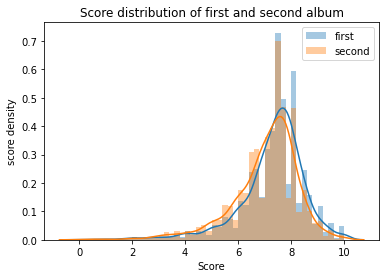

In [419]:
#plot the distributions of first and second albums scores
ax = sns.distplot(first['score'], hist=True, label='first');
ax = sns.distplot(second['score'], hist=True, label='second')
ax.set(title='Score distribution of first and second album',xlabel='Score', ylabel='score density')
plt.legend()
plt.show()

## Task 5.4

Use an appropriate method to determine if the difference in means of 1st and 2nd albums is statistically significant?

In [549]:
#we use a t-test to test if there is not a statistical difference between the means of 1st and 2nd albums
#Assuming their variance is identical and the 2 samples are independent.
result=ttest_ind(first.score,second.score)
result.pvalue

2.7151952502130736e-19

## Task 5.5

**Discuss:** Do these analyses suggest that the "second album syndrome" exists?

**A:** By the t-test, we have as null hypothesis (H0): There is not a statistical differences between the average values of the 2 independent samples, assuming their variance is identical. According to the p-value obtained (<0.05), we can reject this null hypothesis, so indeed it seems the differences between the scores obtained with the first and second  are statistically significant. Comparing the means, we see indeed the score mean for the second album is lower, it suggests that the "second album syndrome" can exist.

**Task 6 (Regression analysis — 20 pts)**

Next, you proceed to examine some hypotheses about the "second album syndrome" using a regression framework. Namely:

- The **time spent hypothesis:**  the first album usually has a couple of years of development under its belt and plenty of trial and error from live concerts to help the band determine what does or doesn't work. The second album, on the other hand, is often made in a rush.

- The **style change hypothesis:** bands often try to change their style after their first album. This change is not always welcomed by the listeners.

1. Create a new dataframe containing one row per 1st-2nd album pair. The dataframe should contain rows:
    - `score_diff`: the difference in scores between the second and the first album (second - first).
    - `time_diff`: the number of days elapsed between the first and the second album.
    - `did_style_change`: a dummy variable that indicates whether the style of the music has changed. To obtain it, first, calculate the [standardized euclidean distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.seuclidean.html) of music-related numerical features¹ between the second and the first album. Second, assign 1 to the 20% most distant 1st-2nd album pairs and 0 to all others.
2. Fit a linear regression using `statsmodels` with this dataframe. Your regression should consider only an intercept, i.e., `"score_diff ~ 1"`.
3. **Discuss:** Interpret the $R^2$ in your regression here. Does this analysis confirm what you observed in Task 5? Why?
4. Include the `time_diff` and `did_style_change` as covariates in your model. Fit the regression again and report the summary of your model. 
5. **Discuss:** Interpret the coefficients `time_diff` and `did_style_change`. Carefully explain whether they provide evidence towards each of the aforementioned hypotheses? Do they rule out other reasons that may cause the "second album syndrome effect"?
6. Create a new column called `time_diff_standardized`. It should be a standardized version of the `time_diff` column. Repeat the regression done in 6.4 using the `time_diff_standardized` column instead of the `time_diff` column.
7. **Discuss:** Explain how the interpretation of the coefficients associated with this new column `time_diff_standardized` differ from its non-standardized version 
`time_diff`?

--- 

**¹** Music related numerical features are:  "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", and "tempo".


## Task 6.1

1. Create a new dataframe containing one row per 1st-2nd album pair. The dataframe should contain rows:

    - `score_diff`: the difference in scores between the second and the first album (second - first).
    - `time_diff`: the number of days elapsed between the first and the second album.
    - `did_style_change`: a dummy variable that indicates whether the style of the music has changed.To obtain it, first, calculate the [standardized euclidean distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.seuclidean.html) of music-related numerical features¹ between the second and the first album. Second, assign 1 to the 20% most distant 1st-2nd album pairs and 0 to all others.
    


In [421]:
#first we order the two dataframe for the first and second album 
first_ord = first.sort_values(by='artist',ascending=True,ignore_index=True)
first_ord.head(5)

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,album_number
0,!!!,Split EP,Dominique Leone,6.0,1999.0,February 12 2004,GSL,Rock,0.470000,0.909500,6.000000,-4.112000,0.095600,0.000449,0.000000,0.177500,0.596500,97.046500,0.0
1,(Sandy) Alex G,Rocket,Ian Cohen,8.4,2017.0,May 19 2017,Domino,Rock,0.461143,0.588929,6.071429,-7.042714,0.049843,0.283422,0.313242,0.222736,0.462714,128.357714,0.0
2,...And You Will Know Us by the Trail of Dead,Madonna,Stuart Berman,8.7,1999.0,November 10 2019,none,Rock,0.614667,0.634583,5.750000,-7.213667,0.047150,0.324892,0.110828,0.220633,0.484750,118.323500,0.0
3,03 Greedo,God Level,Torii MacAdams,8.0,2018.0,July 5 2018,Alamo,Rap,0.745750,0.560100,5.550000,-8.098100,0.165305,0.147820,0.009238,0.157960,0.453755,137.248000,0.0
4,13 & God,13 & God,Brian Howe,8.1,2005.0,May 5 2005,Anticon,Experimental,0.626600,0.572700,4.500000,-11.962400,0.064900,0.477700,0.433760,0.161650,0.190610,119.176200,0.0


In [422]:
second_ord = second.sort_values(by='artist',ascending=True,ignore_index=True)
second_ord.head(5)

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,album_number
0,!!!,Louden Up Now,Nick Sylvester,7.0,2004.0,June 7 2004,Touch and Go,Rock,0.808273,0.751636,6.818182,-7.082636,0.080591,0.116632,0.400204,0.159191,0.692364,119.974091,1.0
1,(Sandy) Alex G,House of Sugar,Anna Gaca,8.6,2019.0,September 16 2019,none,Rock,0.494308,0.639538,4.307692,-5.604154,0.033746,0.255131,0.289322,0.163469,0.421562,109.091385,1.0
2,...And You Will Know Us by the Trail of Dead,Relative Ways EP,Kevin Adickes,8.6,2001.0,November 12 2001,Interscope,Rock,0.706000,0.616200,5.500000,-6.734400,0.079720,0.045293,0.721714,0.111560,0.405200,127.148000,1.0
3,03 Greedo,The Wolf of Grape Street,Paul A. Thompson,8.0,2018.0,March 15 2018,Alamo,Rap,0.675950,0.517650,4.200000,-9.565950,0.206500,0.073767,0.001799,0.164600,0.346965,133.280250,1.0
4,13 & God,Own Your Ghost,Brian Howe,6.0,2011.0,May 17 2011,Anticon,Experimental,0.654000,0.763300,5.300000,-7.146600,0.115490,0.244830,0.254159,0.244720,0.457200,120.444500,1.0


In [519]:
album_pair=pd.DataFrame(columns=['score_diff','time_diff','did_style_change'])
numerical_features=['danceability','energy','key','loudness','speechiness',
                    'acousticness','instrumentalness','liveness','valence','tempo']
album_pair['score_diff']=second_ord['score'] - first_ord['score']
album_pair['time_diff']= (second_ord['releaseyear'] - first_ord['releaseyear'])*365
#std_euc_dist = seuclidean(second_ord[numerical_features],first_ord[numerical_features],np.var(second_ord[numerical_features])) #NOT sure
#std_euc_dist=[for fir,sec in first_ord,second_ord : seuclidean(sec[numerical_features],
#                                                               fir[numerical_features],np.var(fir[numerical_features]))]
#std_euc_dist=[for fir,sec in first_ord[numerical_features],second_ord[numerical_features] : seuclidean(sec,
#                                                               fir,np.var(fir))]

variances= data.var()[numerical_features]
variances #NOT SURE
std_euc_dist=[]
for idd in range(len(first_ord)):
    std_euc_dist.append(seuclidean(first_ord.loc[idd,numerical_features],second_ord.loc[idd,numerical_features],variances))

album_pair['did_style_change']=std_euc_dist
album_pair.head(10)

/var/folders/r7/jht38nh56px_s6jkntzx89n00000gn/T/ipykernel_89716/2108100611.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variances= data.var()[numerical_features]


,score_diff,time_diff,did_style_change
0,1.0,1825.0,3.267899
1,0.2,730.0,1.858988
2,-0.1,730.0,2.748181
3,0.0,0.0,1.340219
4,-2.1,2190.0,2.613386
5,-0.2,1460.0,3.856393
6,-3.2,730.0,5.087794
7,1.7,365.0,3.028512
8,-0.5,365.0,1.866936
9,-0.8,730.0,3.497073


/Users/JeanPierreMero/opt/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


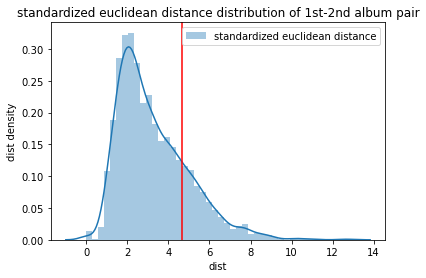

The 20% most distant start from 4.638567807090961


In [520]:
#As we have the standardized euclidean distance we look for the 80% quantile and assign them 0

#plot the distribution of the distances
ax = sns.distplot(album_pair['did_style_change'], hist=True, label='standardized euclidean distance');
ax.set(title='standardized euclidean distance distribution of 1st-2nd album pair',xlabel='dist', ylabel='dist density')
quantile_80 = np.percentile(album_pair['did_style_change'],80,interpolation='nearest')
plt.axvline(quantile_80, color='red')
#np.percentile(album_pair['did_style_change'],80)
plt.legend()
plt.show()
print(f'The 20% most distant start from {quantile_80}')

In [521]:
# assign 0 to the 80% less distant and 20% to the most
album_pair['did_style_change']=album_pair['did_style_change'].apply(lambda x : 1 if x>=quantile_80 else 0)
album_pair.head(10)

,score_diff,time_diff,did_style_change
0,1.0,1825.0,0
1,0.2,730.0,0
2,-0.1,730.0,0
3,0.0,0.0,0
4,-2.1,2190.0,0
5,-0.2,1460.0,0
6,-3.2,730.0,1
7,1.7,365.0,0
8,-0.5,365.0,0
9,-0.8,730.0,0


## Task 6.2

Fit a linear regression using `statsmodels` with this dataframe. Your regression should consider only an intercept, i.e., `"score_diff ~ 1"`.

In [522]:
# Declare the model "score_diff ~ 1"
mod = smf.ols(formula='score_diff ~ 1', data=album_pair)

res = mod.fit()

In [523]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 20 Nov 2021   Prob (F-statistic):                nan
Time:                        21:26:51   Log-Likelihood:                -6194.6
No. Observations:                3561   AIC:                         1.239e+04
Df Residuals:                    3560   BIC:                         1.240e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2675      0.023    -11.584      0.0

## Task 6.3

**Discuss:** Interpret the $R^2$ in your regression here. Does this analysis confirm what you observed in Task 5? Why?

**Answer:** As our regression only consider an intercept, The $R^2$ is = -0.000. Indeed it seems there is not correlation as our model we dont use any predictor to fit our model. Looking to the Intercept coefficient we see it is negative, it confirm the fact that there is a score difference between and the second album is in general less appreciated, so "the second album syndrome" exist.

## Task 6.4

Include the `time_diff` and `did_style_change` as covariates in your model. Fit the regression again and report the summary of your model. 

In [531]:
# Declare the model
mod = smf.ols(formula='score_diff ~ time_diff + C(did_style_change)', data=album_pair)
#(find the optimal coefficients, adding a random seed ensures consistency)
np.random.seed(2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     31.20
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           3.68e-14
Time:                        22:14:19   Log-Likelihood:                -6163.6
No. Observations:                3561   AIC:                         1.233e+04
Df Residuals:                    3558   BIC:                         1.235e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Task 6.5

**Discuss:** Interpret the coefficients `time_diff` and `did_style_change`. Carefully explain whether they provide evidence towards each of the aforementioned hypotheses? Do they rule out other reasons that may cause the "second album syndrome effect"?

**Answer:** Looking for the coefficients, we can see that time_diff is a significant predictor (p=0.000) while a change of style is not (p=0.654).

The coefficients are negative : even if the coefficient of time_diff is low, it shows that if more time happens between the two albums, more the score of the second is lower. This contradicts the **time spent hypothese**, a reason of this could be : if the second album takes more time, more the expectations of the listeners are higher. So they tend to score it lower and be more demanding if the album is not as good as expected.

A change of style leads also to decrease the score, the **style change hypothese** seem to be a cause, althought is it not statistically significant.


## Task 6.6

Create a new column called `time_diff_standardized`. It should be a standardized version of the `time_diff` column. Repeat the regression done in 6.4 using the `time_diff_standardized` column instead of the `time_diff` column.

In [528]:
album_pair['time_diff_standardized']=(album_pair['time_diff']-album_pair['time_diff'].mean())/album_pair['time_diff'].std()
album_pair.head(5)


,score_diff,time_diff,did_style_change,time_diff_standardized
0,1.0,1825.0,0,0.251110
1,0.2,730.0,0,-0.286164
2,-0.1,730.0,0,-0.286164
3,0.0,0.0,0,-0.644347
4,-2.1,2190.0,0,0.430202


In [532]:
# Declare the model
mod = smf.ols(formula='score_diff ~ time_diff_standardized + C(did_style_change)', data=album_pair)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     31.20
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           3.68e-14
Time:                        22:14:54   Log-Likelihood:                -6163.6
No. Observations:                3561   AIC:                         1.233e+04
Df Residuals:                    3558   BIC:                         1.235e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Task 6.7

**Discuss:** Explain how the interpretation of the coefficients associated with this new column `time_diff_standardized` differ from its non-standardized version 
`time_diff`?

**Answer:** There are different coefficient for the Intercept and the time_diff_standardized, their values are more negative. The standardization let us to interpret better the predictors having different scales as : time (in thousands) and change of style (0 or 1). But the evidences of the coefficient are still the same as task 6.6) : more time happens less the score will be and a change of style can lead to a decrease also. Here we see cleary that the time between the albums is very signicant to score.

**Task 7 (Sanity checks — 6 pts)**

You decide to perform a few last sanity checks for your analysis.

1.  **Discuss:** If the Second Album Syndrome existed, i.e., something was special about the second album (as in if it was bad for a very particular reason that afflicted album number 2 more than all others), what would you expect to happen to the mean score of the third album?
2. Using the dataset you created in Task 5, calculate the mean and the standard error of the mean for the 1st, 2nd, 3rd, and 4th albums. Test whether the difference between the average score of the second and the third album is statistically significant.
3. **Discuss:** Does this suggest that the Second Album Syndrome exists?

---


## Task 7.1

**Discuss:** If the Second Album Syndrome existed, i.e., something was special about the second album (as in if it was bad for a very particular reason that afflicted album number 2 more than all others), what would you expect to happen to the mean score of the third album?

**Answer:** if this happens only for the 2nd album, the score of ther third and other would be higher. The expectations of the listener would be lower and the score better. 

## Task 7.2

Using the dataset you created in Task 5, calculate the mean and the standard error of the mean for the 1st, 2nd, 3rd, and 4th albums. Test whether the difference between the average score of the second and the third album is statistically significant.

In [545]:
first=multiple_albums[multiple_albums['album_number']==0]
second=multiple_albums[multiple_albums['album_number']==1]
third=multiple_albums[multiple_albums['album_number']==2]
forth=multiple_albums[multiple_albums['album_number']==3]
print('we obtain a mean : {:.3f} and std : {:.3f} for the first albums'.format(first.score.mean(),first.score.std()))
print('we obtain a mean : {:.3f} and std : {:.3f} for the second albums'.format(second.score.mean(),second.score.std()))
print('we obtain a mean : {:.3f} and std : {:.3f} for the third albums'.format(third.score.mean(),third.score.std()))
print('we obtain a mean : {:.3f} and std : {:.3f} for the forth albums'.format(forth.score.mean(),forth.score.std()))

we obtain a mean : 7.303 and std : 1.239 for the first albums
we obtain a mean : 7.035 and std : 1.268 for the second albums
we obtain a mean : 7.057 and std : 1.215 for the third albums
we obtain a mean : 7.040 and std : 1.244 for the forth albums


In [546]:
#we use a t-test to test if there is not a statistical difference between the means of 2nd and 3rd albums
#Assuming their variance is identical and the 2 samples are independent.
result2=ttest_ind(second.score,third.score)
result2.pvalue

0.5428388093014483

**A:** By the t-test, we have as null hypothesis (H0): There is not a statistical differences between the average values of the 2 independent samples, assuming their variance is identical. According to the p-value obtained (>0.05), we can not reject this null hypothesis, so it seems the differences between the scores obtained with the second and three  are not statistically significant.

## Task 7.3

**Discuss:** Does this suggest that the Second Album Syndrome exists?


**Answer:** This (task 7.2) does suggest that the Second Album Syndrom doesn't exist. At least that the 3rd one is also less scored and their difference is not statistically significant.

**Task 8 (Eureka — 14 pts)**

Your boss, *Signor Piccardi*, proposes that you carry out a simulation to make things clearer. Assuming that:


- Each band $i$ has a "talent" $\mu_i$ , which is uniformally distributed between 2 and 8, i.e., $\mu_i \sim U_{[2,8]}$.
- When a band $i$ produces an album $j$, it has quality $s_j$. This score is normally distributed with mean $\mu_i$ and standard deviation $1$, i.e., $s_j \sim N(\mu_i, 1)$
- Talents are independent and identically distributed random variables.
 
Carry out the following simulation:

- Create 1000 hypothetical bands with intrinsic talents $\mu_i \sim U_{[2,8]}$ for $i \in [1,1000]$.
- Have each hypothetical band create a hypothetical album.
- Discard all bands whose albums received a score smaller than 6.
- For each of the remaining bands, create two additional albums.

Analyzing the scores obtained in this simulation, provide a coherent explanation for the  scores obtained in Task 7.2. 

--- 

**Hint:** You can use numpy to sample random variables (e.g. [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html))